# 📈 Predicting Sales from Advertising Spend  
## Linear Regression using Scikit-learn  
**Project 2 — Coding Samurai Internship**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [16]:
# Load the advertising dataset
df = pd.read_csv("Advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [17]:
# Check shape and data types
print("Shape:", df.shape)
print("\nInfo:")
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Clean up column names (remove spaces)
df.columns = df.columns.str.strip()
print("\nColumn names after strip:", df.columns.tolist())

Shape: (200, 4)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB

Missing Values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Column names after strip: ['TV', 'Radio', 'Newspaper', 'Sales']


In [18]:
# Summary statistics
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


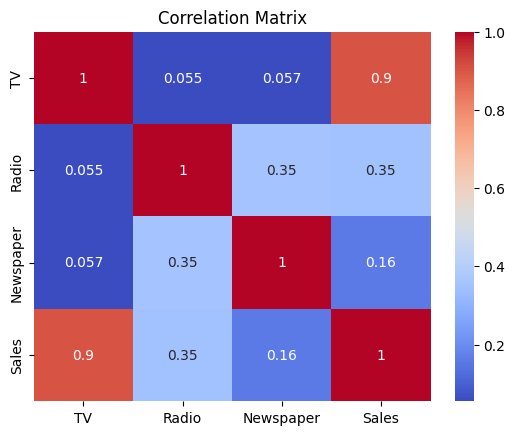

In [19]:
import os
import re

os.makedirs("images", exist_ok=True)
plot_title = "Correlation Matrix"
filename = re.sub(r'[^A-Za-z0-9]+', '_', plot_title.lower()) + ".png"

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title(plot_title)

plt.savefig(f"images/{filename}", dpi=300, bbox_inches='tight')
plt.show()

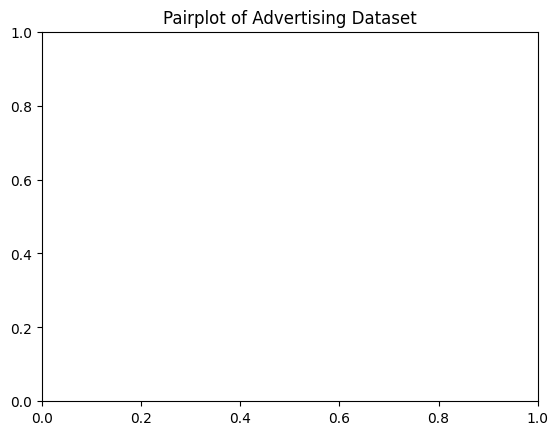

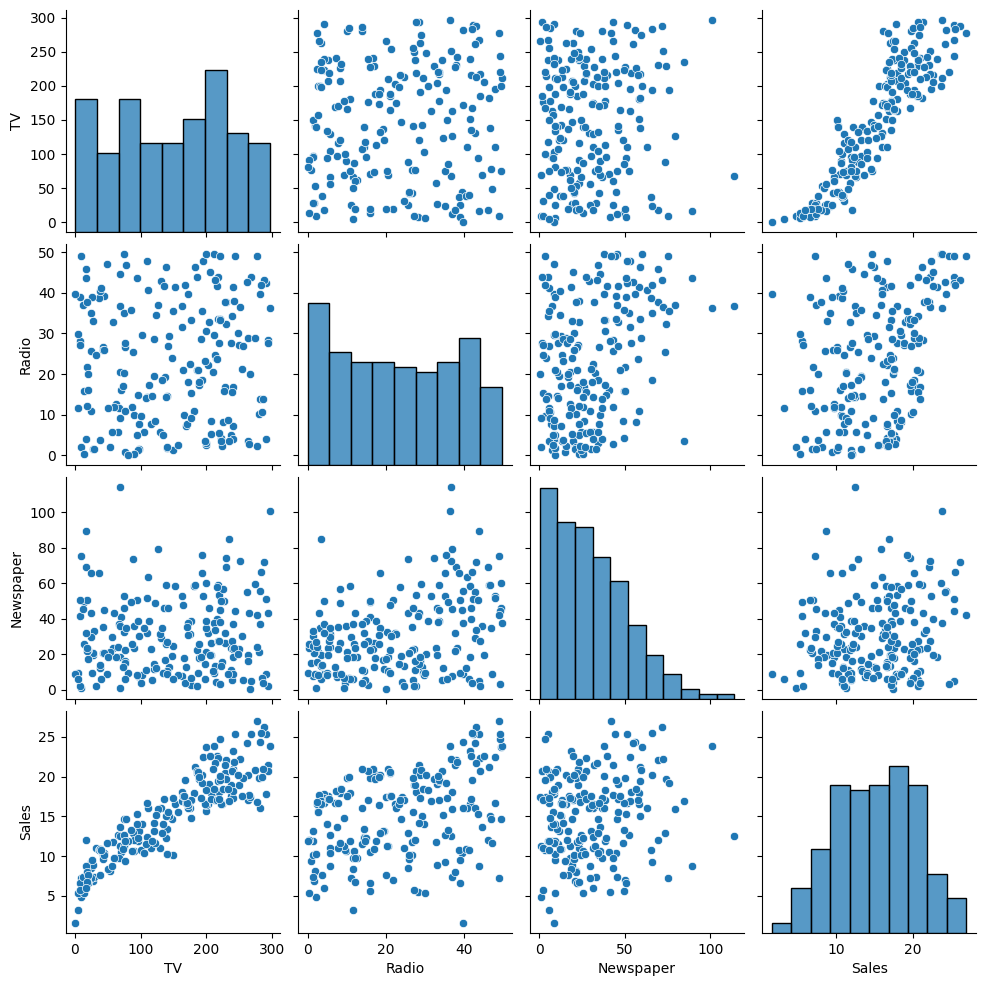

In [20]:
os.makedirs("images", exist_ok=True)
plot_title = "Pairplot of Advertising Dataset"
filename = re.sub(r'[^A-Za-z0-9]+', '_', plot_title.lower()) + ".png"

plt.title(plot_title)
sns.pairplot(df)

plt.savefig(f"images/{filename}", dpi=300, bbox_inches='tight')
plt.show()

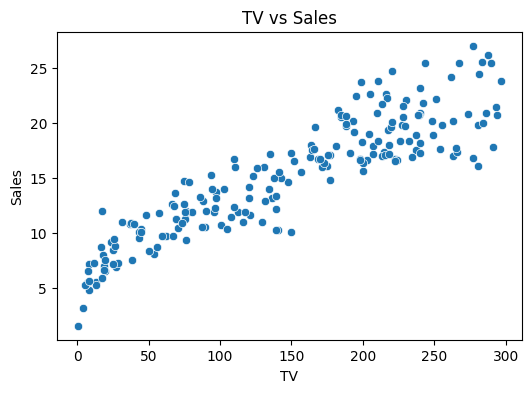

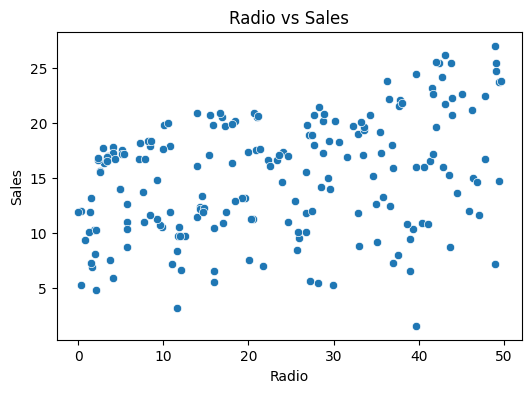

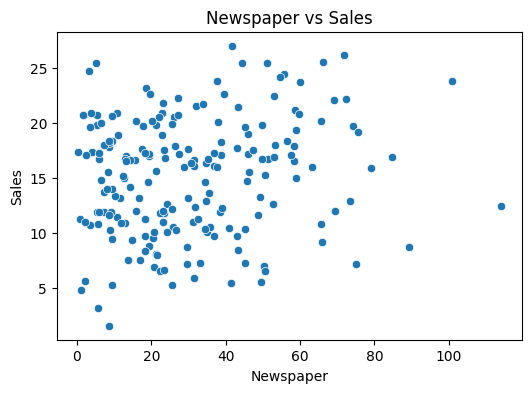

In [21]:
features = ['TV', 'Radio', 'Newspaper']

for feature in features:
    os.makedirs("images", exist_ok=True)
    plot_title = f"{feature} vs Sales"
    filename = re.sub(r'[^A-Za-z0-9]+', '_', plot_title.lower()) + ".png"
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[feature], y=df['Sales'])
    plt.title(plot_title)
    plt.xlabel(feature)
    plt.ylabel("Sales")
    plt.savefig(f"images/{filename}", dpi=300, bbox_inches='tight')
    plt.show()

In [22]:
# Features (independent variables)
X = df[['TV', 'Radio', 'Newspaper']]

# Target (dependent variable)
y = df['Sales']

In [23]:
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 4.714126402214127
Coefficients: [0.05450927 0.10094536 0.00433665]


In [25]:
# Make predictions
y_pred = model.predict(X_test)

In [26]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 1.27
RMSE: 1.71
R² Score: 0.91


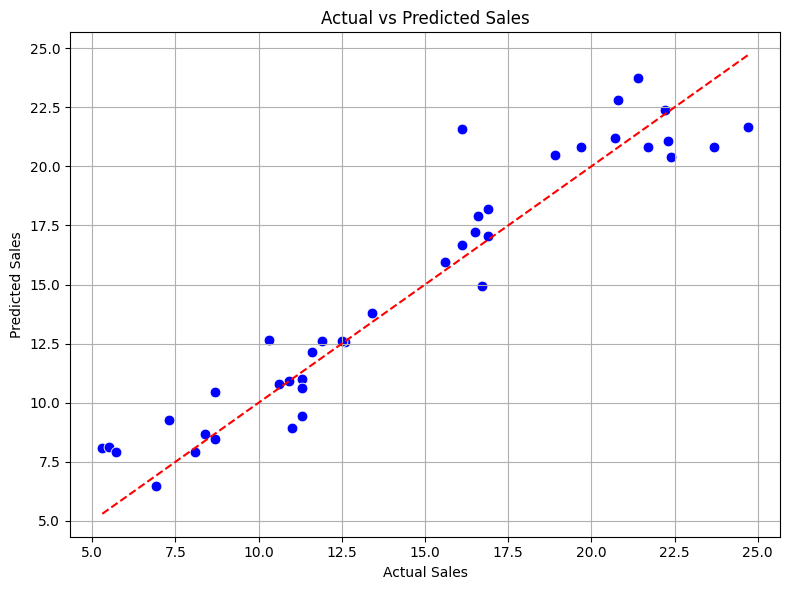

In [27]:
os.makedirs("images", exist_ok=True)
plot_title = "Actual vs Predicted Sales"
filename = re.sub(r'[^A-Za-z0-9]+', '_', plot_title.lower()) + ".png"

# Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title(plot_title)
plt.grid(True)
plt.tight_layout()
plt.savefig(f"images/{filename}", dpi=300, bbox_inches='tight')
plt.show()

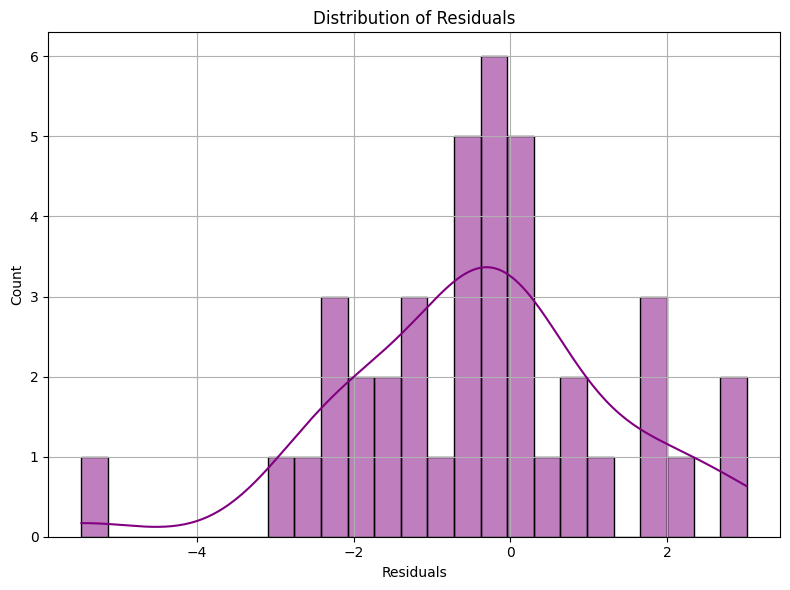

In [28]:
os.makedirs("images", exist_ok=True)
plot_title = "Distribution of Residuals"
filename = re.sub(r'[^A-Za-z0-9]+', '_', plot_title.lower()) + ".png"
# Calculate residuals
residuals = y_test - y_pred

# Plot the residuals
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=25, color='purple')
plt.xlabel("Residuals")
plt.title(plot_title)
plt.grid(True)
plt.tight_layout()
plt.savefig(f"images/{filename}", dpi=300, bbox_inches='tight')
plt.show()

## 📌 Project Conclusion

In this project, we explored the relationship between advertising spend and sales using a simple linear regression model.

🔍 **Key Insights:**
- TV and Radio have a strong positive correlation with Sales.
- Newspaper spend showed the weakest relationship.
- The model achieved an R² score of **0.91**, indicating that approximately **91%** of the variance in sales is explained by our model.

📈 **Skills Demonstrated:**
- Data cleaning and preprocessing
- Exploratory data analysis and visualization
- Building and evaluating a linear regression model using Scikit-learn

This project serves as a foundational step in my journey into machine learning. 🚀